In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [ ]:
def calculate_sma(data, short_window=50, long_window=200):
    data['Short_SMA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
    data['Long_SMA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
    return data

In [ ]:
def backtest_sma_strategy(stock_symbol, start_date, end_date, sma_buy_condition=lambda x: x['Short_SMA'] > x['Long_SMA'],
                           sma_sell_condition=lambda x: x['Short_SMA'] < x['Long_SMA']):
    data = yf.download(stock_symbol, start=start_date, end=end_date)

    data = calculate_sma(data)

    position = 0
    capital = 100000

    buy_signals = []
    sell_signals = []
    profitable_trades = 0

    for i in range(1, len(data)):
        if sma_buy_condition(data.iloc[i]) and position == 0:
            buy_signals.append(data.index[i])
            position = 1
            stocks_bought = capital // data['Close'][i]
            capital -= stocks_bought * data['Close'][i]

        elif sma_sell_condition(data.iloc[i]) and position == 1:
            sell_signals.append(data.index[i])
            if data['Close'][sell_signals[-1]] > data['Close'][buy_signals[-1]]:
                profitable_trades += 1
            position = 0
            capital += data['Close'][i] * stocks_bought

        elif i == len(data) - 1 and position == 1:
            capital += data['Close'][i] * stocks_bought
            sell_signals.append(data.index[i])
            if data['Close'][buy_signals[-1]] < data['Close'][i]:
                profitable_trades += 1

    win_rate = np.NaN
    total_trades = len(buy_signals)
    if total_trades != 0:
        win_rate = (profitable_trades / total_trades) * 100

    capital_buy_and_hold = 100000
    stocks_buy_and_hold = capital_buy_and_hold // data['Close'].iloc[0]
    capital_buy_and_hold -= data['Close'].iloc[0] * stocks_buy_and_hold
    capital_buy_and_hold += data['Close'].iloc[-1] * stocks_buy_and_hold

    return capital, win_rate, capital_buy_and_hold

In [ ]:
nifty50 = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2]['Symbol']
nifty50 = pd.DataFrame({'Symbol': nifty50})
nifty50['Symbol'] = nifty50['Symbol'] + '.NS'

nifty50_list = nifty50['Symbol'].unique().tolist()

start_date = '2023-01-01'
end_date = '2024-01-01'

results = []
for stock_symbol in nifty50_list:
    result = backtest_sma_strategy(stock_symbol, start_date, end_date)
    results.append({'Stock Symbol': stock_symbol, 'Strategy': result[0], 'Win Rate': result[1], 'Buy and Hold': result[2]})

df = pd.DataFrame(results)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
df.dropna(inplace=True)
df

,Stock Symbol,Strategy,Win Rate,Buy and Hold
0,ADANIENT.NS,118288.052002,100.000000,74201.500000
1,ADANIPORTS.NS,149603.500000,100.000000,124448.048523
2,APOLLOHOSP.NS,128982.797852,100.000000,127494.500000
3,ASIANPAINT.NS,102573.498535,50.000000,111364.796875
4,AXISBANK.NS,115902.257690,100.000000,117034.207764
5,BAJAJ-AUTO.NS,179748.500000,100.000000,187029.101318
6,BAJFINANCE.NS,105925.500000,100.000000,111610.000000
7,BAJAJFINSV.NS,113728.301636,100.000000,108531.203125
8,BPCL.NS,113733.058899,66.666667,134923.196350
9,BHARTIARTL.NS,126138.492554,100.000000,126681.394043


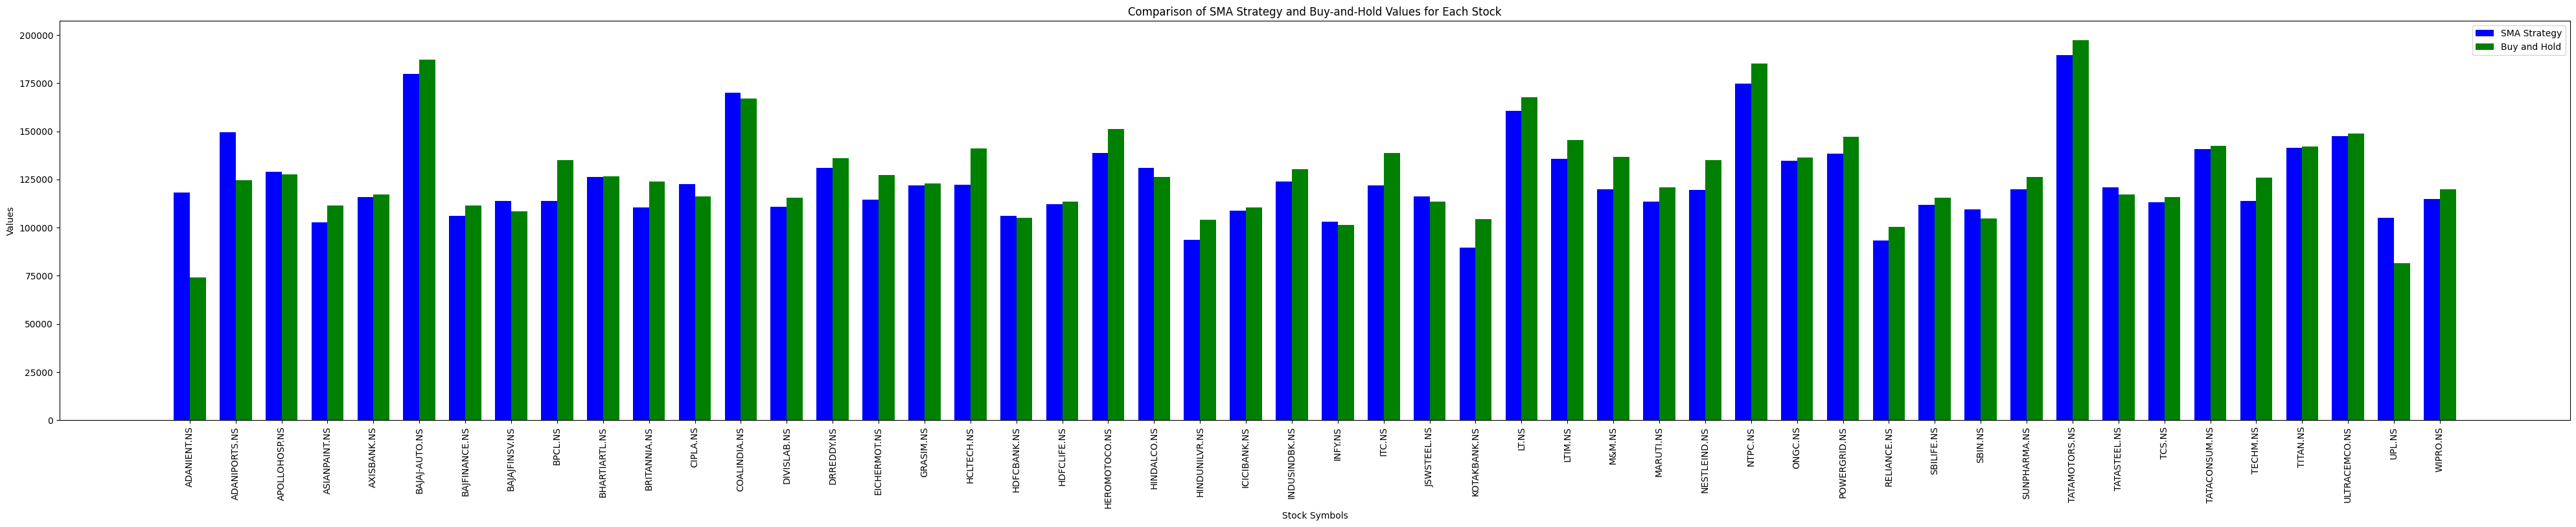

In [ ]:
plt.figure(figsize=(50, 8))

bar_width = 0.35
index = np.arange(len(df))

plt.bar(index, df['Strategy'], width=bar_width, color='blue', label='SMA Strategy')
plt.bar(index + bar_width, df['Buy and Hold'], width=bar_width, color='green', label='Buy and Hold')

plt.title('Comparison of SMA Strategy and Buy-and-Hold Values for Each Stock')
plt.xlabel('Stock Symbols')
plt.ylabel('Values')
plt.xticks(index + bar_width / 2, df['Stock Symbol'], rotation=90)
plt.legend()
plt.show()

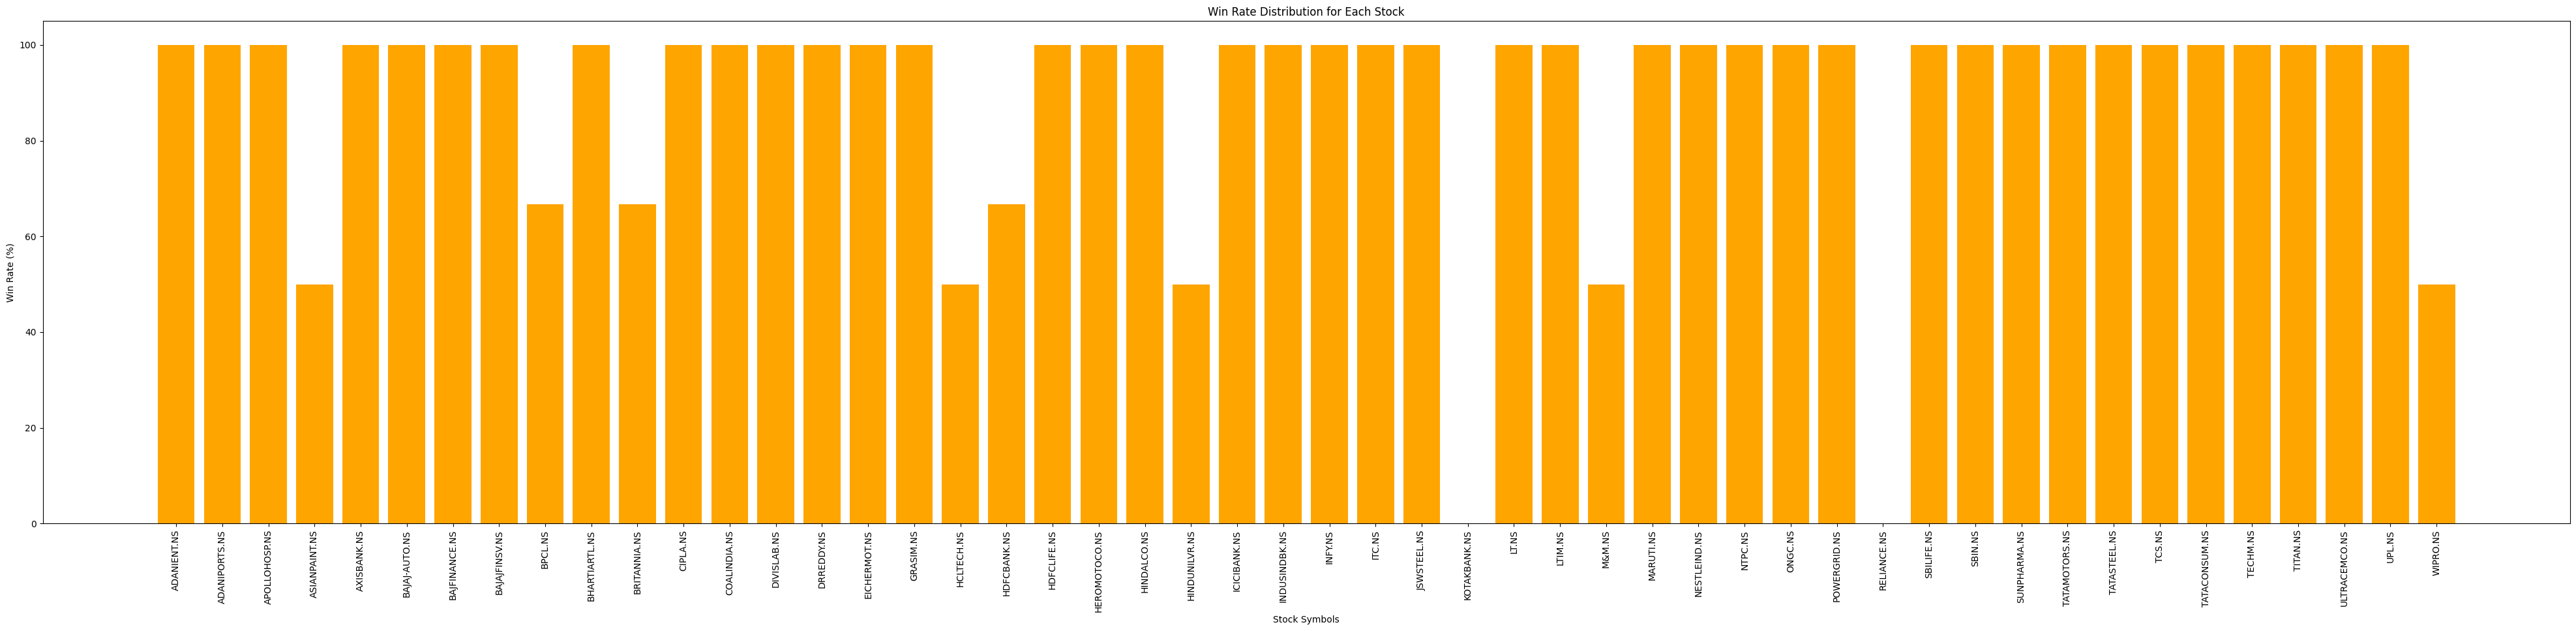

In [ ]:
plt.figure(figsize=(50, 10))
plt.bar(df['Stock Symbol'], df['Win Rate'], color='orange')
plt.title('Win Rate Distribution for Each Stock')
plt.xlabel('Stock Symbols')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
average_win_rate = df['Win Rate'].mean()
print(f"Average Win Rate: {average_win_rate:.2f}")

Average Win Rate: 89.00


In [ ]:
initial_capital = 100000
df['Strategy Percentage Return'] = ((df['Strategy'] - initial_capital) / initial_capital) * 100
df['Buy and Hold Percentage Return'] = ((df['Buy and Hold'] - initial_capital) / initial_capital) * 100

average_strategy_percentage_return = df['Strategy Percentage Return'].mean()
average_buy_and_hold_percentage_return = df['Buy and Hold Percentage Return'].mean()

print(f"Average SMA Strategy Percentage: {average_strategy_percentage_return:.2f}%")
print(f"Average Buy and Hold Percentage: {average_buy_and_hold_percentage_return:.2f}%")

Average SMA Strategy Percentage: 24.44%
Average Buy and Hold Percentage: 27.68%
